In [53]:
import pyautogui
import time
import os 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

pyautogui.FAILSAFE = True # stop code condition
## Positions on the screen
PosBuscar=(90, 749)
PosFile=(214,128)
PosOpen=(239,156)
PosRun=(495,149)
PosSavcsv = (600,458)
Poscsv=(299,146)

In [3]:
# the paths of the simulation files is defined 
pathAllPC1='C:\\PyPen2\\TiNonSi_Batch12kv_30kv_50nm_1000nm'
pathAllPC2='C:\\pypenelope\\SiTotal_20to4000nm'

In [8]:
allfiles = os.listdir(pathAllPC2)

In [30]:
def dividelist(l,number):
    d = int(len(l)/number)
    print(len(l)%number)
    r = []
    for i in range(number):
        r.append(l[d*i:d*(1+i)])
    return r

In [31]:
Lruns = dividelist(allfiles,4)

0


Empieza la espera parcial de 2.5 min
166.50238466262817
Empieza la espera parcial de 2.5 min
166.8923864364624
Empieza la espera parcial de 2.5 min
167.7116298675537
Empieza la espera parcial de 2.5 min
170.2251410484314
Empieza la espera parcial de 2.5 min
170.79999423027039
Empieza la espera parcial de 2.5 min
170.60602474212646
Empieza la espera parcial de 2.5 min
170.07936429977417
Empieza la espera parcial de 2.5 min
170.4924817085266
Empieza la espera parcial de 2.5 min
170.86693954467773
Empieza la espera parcial de 2.5 min
170.55269837379456
Empieza la espera parcial de 2.5 min
170.53589749336243
Empieza la espera parcial de 2.5 min
170.79773569107056
Empieza la espera parcial de 2.5 min
170.60435247421265
Empieza la espera parcial de 2.5 min
170.87883734703064
Empieza la espera parcial de 2.5 min
171.2306990623474
Empieza la espera parcial de 2.5 min
171.24562096595764
Empieza la espera parcial de 2.5 min
170.8829264640808
Empieza la espera parcial de 2.5 min
170.8080503940582

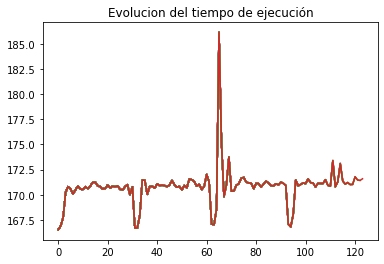

In [40]:
#running the simulations
tiniT=time.time()
tim=[]
i=0
for runs in Lruns:
    for names in runs:#listo
        i=i+1
        t0=time.time()
        pyautogui.moveTo(PosBuscar)
        pyautogui.click()
        time.sleep(0.5)
        pyautogui.write('Pypenelope', interval=0.1)
        pyautogui.press('enter')
        # en ese momento se abrira el software pypenelope
        time.sleep(2)
        pyautogui.moveTo(PosFile)
        pyautogui.click()
        pyautogui.moveTo(PosOpen)
        time.sleep(1)
        pyautogui.click()
        pyautogui.write(pathAllPC2+'\\'+names,interval=0.05)
        pyautogui.press('enter')
        textaux = os.listdir(pathAllPC2+'\\'+names)
        text = [f for f in textaux if f[-4:] == '.xml'][0]
        ## corrección que solo abra el tipo de archivos xml
        pyautogui.write(text)
        pyautogui.press('enter')
        time.sleep(2.5)
        pyautogui.moveTo(PosRun)
        time.sleep(2.5)
        #pyautogui.click()
        pyautogui.click()
        pyautogui.press('enter')
        print('Empieza la espera parcial de 2.5 min')
        time.sleep(60*2.5)
        tff=time.time()
        print(tff-t0)
        tim.append(tff-t0)
        plt.plot(tim)
        plt.title('Evolucion del tiempo de ejecución')
    print('primer ciclo terminado')
    tf=time.time()
    delta=tf-t0
    print(delta)
    time.sleep(550)

In [41]:
len(tim)

124

In [45]:
import numpy as np 
np.array(tim).sum()/3600

5.883917492032051

In [72]:
j=0
tiniT=time.time()
for names in allfiles:
    j+=1
    if j==1:
        t0=time.time()
        pyautogui.moveTo(PosBuscar)
        pyautogui.click()
        time.sleep(0.5)
        pyautogui.write('Pypenelope', interval=0.1)
        pyautogui.press('enter')
        # en ese momento se abrira el software pypenelope
        time.sleep(2)
        pyautogui.moveTo(PosFile)
        pyautogui.click()
        pyautogui.moveTo(PosOpen)
        time.sleep(1)
        pyautogui.click()
        pyautogui.write(pathAllPC2+'\\'+names,interval=0.01)
        pyautogui.press('enter')
        textaux = os.listdir(pathAllPC2+'\\'+names)
        text = [f for f in textaux if f[-4:] == '.xml'][0]
        ## corrección que solo abra el tipo de archivos xml
        pyautogui.write(text)
        pyautogui.press('enter')
        time.sleep(2)
        pyautogui.moveTo(Poscsv)
        pyautogui.click()
        pyautogui.moveTo(PosSavcsv)
        time.sleep(0.1)
        pyautogui.click()
        pyautogui.press('delete',presses=70,interval=0.1)
        pyautogui.write(pathAllPC2+'\\'+names,interval=0.1)
        pyautogui.press('enter')
        time.sleep(1)
        pyautogui.press('enter')
        print(f'listo {names}, el número {j}')
    else:
        time.sleep(2)
        pyautogui.moveTo(PosFile)
        pyautogui.click()
        pyautogui.moveTo(PosOpen)
        time.sleep(1)
        pyautogui.click()
        pyautogui.write(pathAllPC2+'\\'+names,interval=0.01)
        pyautogui.press('enter')
        textaux = os.listdir(pathAllPC2+'\\'+names)
        text = [f for f in textaux if f[-4:] == '.xml'][0]
        ## corrección que solo abra el tipo de archivos xml
        pyautogui.write(text)
        pyautogui.press('enter')
        time.sleep(3)
        pyautogui.moveTo(Poscsv)
        pyautogui.click()
        pyautogui.moveTo(PosSavcsv)
        time.sleep(0.2)
        pyautogui.click()
        pyautogui.click()
        pyautogui.press('delete',presses=100,interval=0.1)
        pyautogui.write(pathAllPC2+'\\'+names,interval=0.1)
        pyautogui.press('enter')
        time.sleep(1)
        pyautogui.press('enter')
        print(f'listo {names}, el número {j}')

tff=time.time()
print(tff-tiniT)
tim.append(tff-tiniT)

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [50]:
pyautogui.moveTo(PosSavcsv)

In [52]:
pyautogui.position()

Point(x=600, y=458)

In [55]:
vacios=[]
dic1={}
dic2={}
dic3={}
for names in allfiles:
    textaux = os.listdir(pathAllPC2+'\\'+names)
    text = [f for f in textaux if f[:9] == 'intensity']
    if text == []:
        vacios.append(names)
    else:
        newstr = ''.join((ch if ch in '0123456789' else ' ') for ch in names)#toma los numeros del nombre del archivo
        listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
        e0 = listOfNumbers[3]
        th = listOfNumbers[1]
        dfd1=pd.read_csv(pathAllPC2+'\\'+names+'\\'+'intensity_1.csv')
        dfd1.columns = ['Z', 'IUPAC', 'Siegbahn', 'Source subshell', 'Destination subshell',
       'Energy (kev)', 'P', 'P_unc', 'C', 'C_unc', 'B', 'B_unc', 'TF',
       'TF_unc', 'Total', 'T_unc']
        dic1[(e0,th)]=dfd1
        
        dfd2=pd.read_csv(pathAllPC2+'\\'+names+'\\'+'intensity_2.csv')
        dfd2.columns = ['Z', 'IUPAC', 'Siegbahn', 'Source subshell', 'Destination subshell',
       'Energy (kev)', 'P', 'P_unc', 'C', 'C_unc', 'B', 'B_unc', 'TF',
       'TF_unc', 'Total', 'T_unc']
        dic2[(e0,th)]=dfd2
        
        dfd3=pd.read_csv(pathAllPC2+'\\'+names+'\\'+'intensity_3.csv')
        dfd3.columns = ['Z', 'IUPAC', 'Siegbahn', 'Source subshell', 'Destination subshell',
       'Energy (kev)', 'P', 'P_unc', 'C', 'C_unc', 'B', 'B_unc', 'TF',
       'TF_unc', 'Total', 'T_unc']
        dic3[(e0,th)]=dfd3

In [59]:
def tratDatos(dic):
    """
    FUnción que retorna un dataframe con los datos de la intensidad y el Iratio*
    """
    energy, thickness = [], []
    Tik, Nk, Sik = [], [], []
    for key, value in dic.items():
        energy.append(key[0])
        thickness.append(key[1])
        dfaux=dic[key][(dic[key].Siegbahn=='Ka1') | (dic[key].Siegbahn=='Ka2') | (dic[key].Siegbahn=='Kb1')|(dic[key].Siegbahn=='Kb2')]
        Tik.append(dfaux[dfaux.Z==22].Total.sum())
        dfaux[dfaux.Z==22].T_unc.sum()
        Sik.append(dfaux[dfaux.Z==14].Total.sum())
        dfaux[dfaux.Z==14].T_unc.sum()
    dic_data={'Energy':energy,'Thickness':thickness,'Tik':Tik,'Sik':Sik}
    dft=pd.DataFrame(dic_data)
    dft['I_ratio']=dft['I_ratio']=dft.Sik/dft.Tik
    df1=dft.set_index(['Energy','Thickness']).sort_index()
    return df1

In [60]:
dfdet1=tratDatos(dic1)
dfdet2=tratDatos(dic2)
dfdet3=tratDatos(dic3)

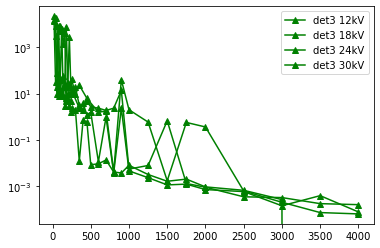

In [71]:
for e in range(12,31,6):
    #plt.plot(dfdet1.loc[e].I_ratio,'r*',label=f'det1 {e}kV')
    #plt.plot(dfdet2.loc[e].I_ratio,'bo-',label=f'det2 {e}kV')
    plt.plot(dfdet3.loc[e].I_ratio,'g^-',label=f'det3 {e}kV')
    plt.yscale('log')
plt.legend()

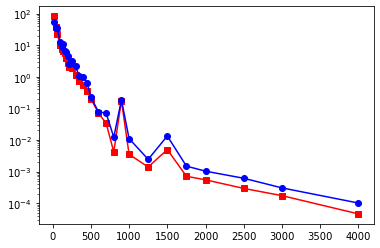

In [70]:
e=12
plt.plot(dfdet1.loc[e].I_ratio,'rs-',label=f'det1 {e}kV')
plt.plot(dfdet2.loc[e].I_ratio,'bo-',label=f'det2 {e}kV')
plt.yscale('log')